## Foreign Currency API

In [1]:
#pip install requests

#import necessary packages and libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize 


In [2]:
# establish connection with API
URL = 'https://api.frankfurter.app/2013-01-01..'

#retrieving response from frankfurter api from 2020 to current year
response = requests.get(URL)
data  = response.json()

#convert json file to dataframe
frame = pd.DataFrame(data)

#normalizde rates into tables
table = json_normalize(frame['rates'])

frame = frame.reset_index()
#drop rates column in frame
frame = frame.drop('rates', axis = 1)

#concatenate frame and table
frame = pd.concat([frame,table], axis = 1)
frame

,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,2012-12-31,1.0,EUR,2012-12-31,2023-10-02,1.2534,1.9558,2.6831,1.2960,1.20910,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,2013-01-07,1.0,EUR,2012-12-31,2023-10-02,1.2454,1.9558,2.6658,1.2930,1.21060,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,2013-01-14,1.0,EUR,2012-12-31,2023-10-02,1.2649,1.9558,2.7182,1.3157,1.23720,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,2013-01-21,1.0,EUR,2012-12-31,2023-10-02,1.2713,1.9558,2.7238,1.3324,1.24100,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,2013-01-28,1.0,EUR,2012-12-31,2023-10-02,1.2985,1.9558,2.7009,1.3572,1.23950,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,2023-09-04,1.0,EUR,2012-12-31,2023-10-02,1.6776,1.9558,5.3316,1.4649,0.95514,...,4.5332,4.9558,NaN,11.9079,1.4616,38.089,28.7840,1.0738,20.5390,143.62
558,2023-09-11,1.0,EUR,2012-12-31,2023-10-02,1.6649,1.9558,5.2753,1.4517,0.95704,...,4.6373,4.9684,NaN,11.9075,1.4586,38.241,28.8440,1.0712,20.3070,144.34
559,2023-09-18,1.0,EUR,2012-12-31,2023-10-02,1.6550,1.5646,5.2038,1.4362,0.96076,...,4.6306,4.9700,NaN,11.9114,1.4563,38.386,28.8950,1.0672,20.1770,145.22
560,2023-09-25,1.0,EUR,2012-12-31,2023-10-02,1.6489,1.9558,5.2827,1.4263,0.96756,...,4.6172,4.9723,NaN,11.6293,1.4469,38.564,28.9130,1.0581,20.0910,145.06


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

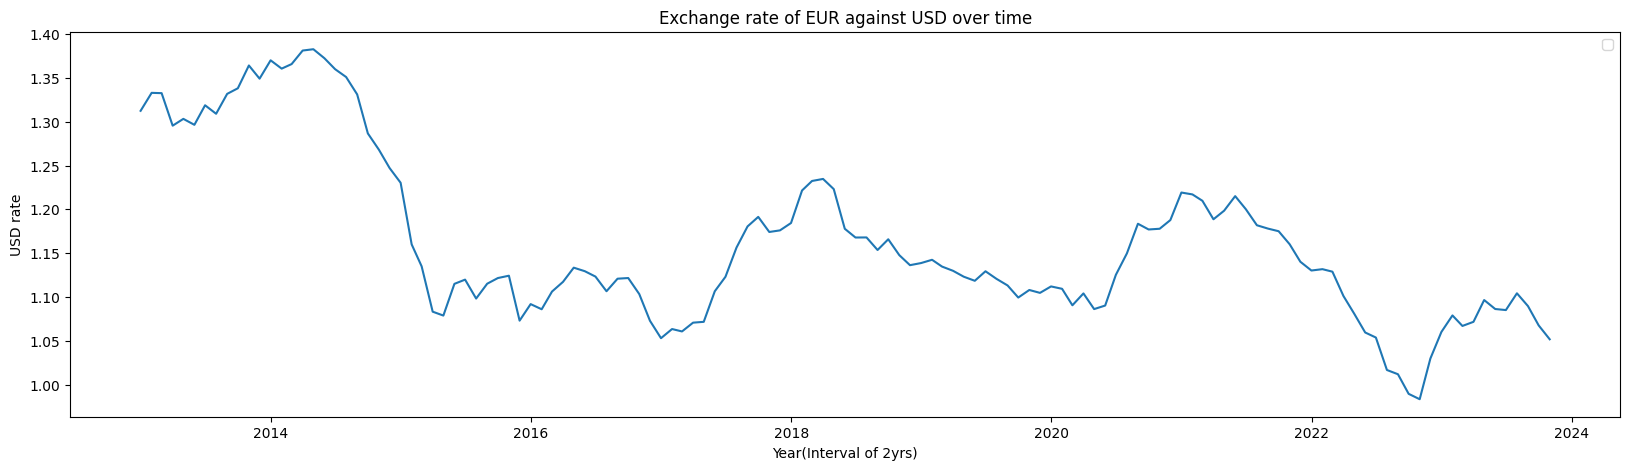

In [3]:
#convert index to datetime datatype
frame['index'] = pd.to_datetime(frame['index'])

US_rate = frame[['index','USD']]



#prepare data to plot
#set index and sort
us_rate = US_rate.set_index('index').sort_index(ascending = True)


#group by month and calculate mean
monthly_rate = us_rate['USD'].resample('M').mean()

monthly_rate


#plot us_rate over time
#visualization settings
plt.figure(figsize=(20,5))
sns.lineplot(monthly_rate)
plt.xlabel('Year(Interval of 2yrs)')
plt.ylabel('USD rate')
plt.title('Exchange rate of EUR against USD over time')
plt.legend()
plt.show()



<b>2. What is the distribution of exchange rates for the Chinese Yuan (CNY) against the Euro (EUR)?
• Visualization: Histogram or kernel density plot for the distribution of CNY to EUR exchange rates.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   562 non-null    datetime64[ns]
 1   CNY     562 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


<Figure size 2000x700 with 0 Axes>

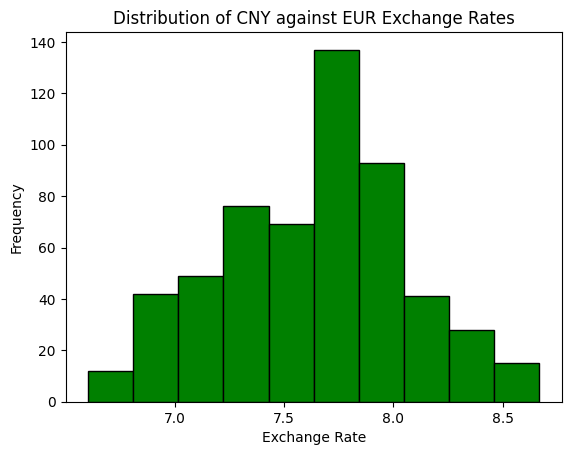

In [4]:
#selecting data on CNY
CNY = frame[['index','CNY']]

CNY.info()


#plot distribution of CHY over the last 10 years
#visualization settings
plt.figure(figsize=(20,7))
CNY.plot(kind='hist', color= 'green', edgecolor = 'black', legend= False)
plt.title('Distribution of CNY against EUR Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')

plt.show()

<b>3. Between the Great British Pound (GBP) and the Japanese Yen (JPY) determine which country's currency is more volatile
• Visualization: Bar chart comparing the volatility of the selected currencies.

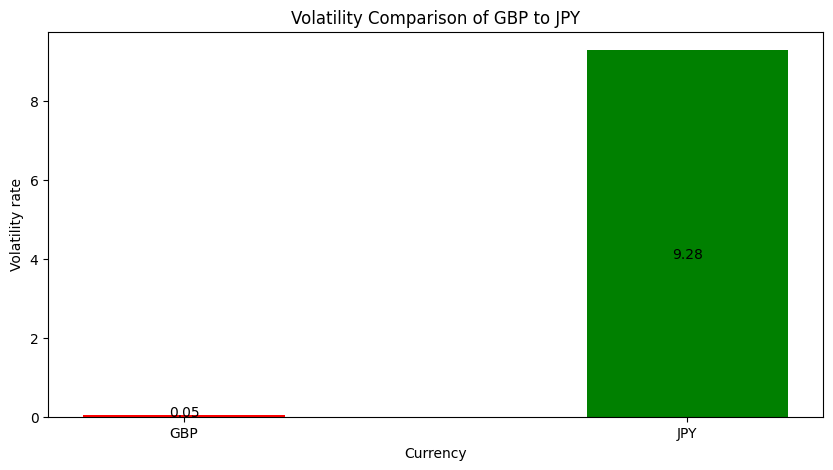

In [5]:
#volatility is the rate of change of the currency over time
#in other the words how each recorded currency rate varies from the others within a series or column in the dataframe.
#therefore currency volatility can be described using the variance or standard deviation

# Calculate Volatility for GBP and JPY
volatility = pd.DataFrame({'Currency': ['GBP', 'JPY'],
                           'Volatility': [round(frame['GBP'].std(), 2), round(frame['JPY'].std(), 2)]})


#plot bar chart
#visualization settings
plt.figure(figsize=(10,5), )
plt.bar(volatility['Currency'], volatility['Volatility'], align='center', color = ['red', 'green'], width= 0.4,)

# function to add value labels
def addlabels():
    for i in range(len(volatility['Currency'])):
        plt.text(i, volatility['Volatility'][i]//2, volatility['Volatility'][i], ha = 'center')

addlabels()
plt.xlabel('Currency')
plt.ylabel('Volatility rate')
plt.title('Volatility Comparison of GBP to JPY')
plt.show()


<b>4. Is there a correlation between the exchange rates of the Canadian Dollar (CAD) and the American Dollar (USD)??
• Visualization: Scatter plot with CAD to USD and data points representing the exchange rates.

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


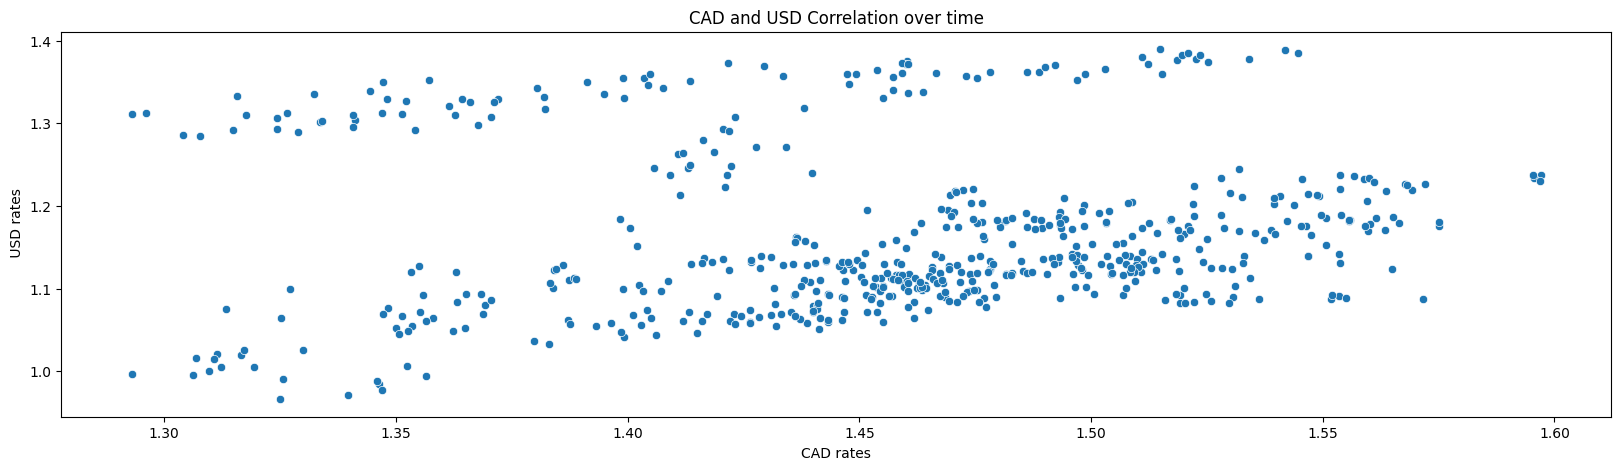

Correlation between CAD and USD exchange rates: 0.09. There is a very weak correlation between CAD and USD.


In [6]:
#retrieve necessary data
dollar = frame[['CAD', 'USD']]
dollar

#plot scatterplot of CAD and USD
#visualization settings
plt.figure(figsize=(20,5))
sns.scatterplot(x= dollar['CAD'], y=dollar['USD'] )
plt.xlabel('CAD rates')
plt.ylabel(' USD rates')
plt.title('CAD and USD Correlation over time')
plt.show()
#draw your line of best fit

#calculate correlation
correlation = dollar['CAD'].corr(dollar['USD'])
print(f"Correlation between CAD and USD exchange rates: {round(correlation, 2)}. There is a very weak correlation between CAD and USD.")
